In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
mitbih_train = pd.read_csv("../Data/mitbih_train.csv", header=None)
mitbih_test = pd.read_csv("../Data/mitbih_test.csv", header=None)

In [3]:
mitbih_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mitbih_train[187].unique()

array([0., 1., 2., 3., 4.])

The last column is our label column. And as seen below, the data is very skewed. Later we can perform upsampling for class 1,2,3,4. But for now, I think I will just use some classifier that works well with skew data like decision tree.

In [5]:
mitbih_train[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

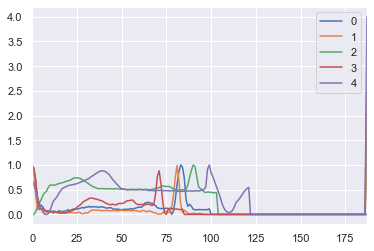

In [6]:
mitbih_train.loc[0].plot()
mitbih_train.loc[72480].plot()
mitbih_train.loc[74700].plot()
mitbih_train.loc[80490].plot()
mitbih_train.loc[87550].plot()
plt.legend(["0", "1", "2", "3", "4"])
plt.show()

In [7]:
mitbih_train.shape

(87554, 188)

In [8]:
mitbih_test.shape

(21892, 188)

In [9]:
X_train = mitbih_train.iloc[:, :186]
y_train = mitbih_train.iloc[:, 187]
X_test = mitbih_test.iloc[:, :186]
y_test = mitbih_test.iloc[:, 187]

let's try doing Decision tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
print("Out sampled error")
print(accuracy_score(predicted, y_test))
predicted_in = clf.predict(X_train)
print("In sampled error")
print(accuracy_score(predicted_in, y_train))

Out sampled error
0.9543668920153481
In sampled error
1.0


In [11]:
cv_score = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)
print("Average cross validated score:")
print(np.mean(cv_score))

Average cross validated score:
0.9539826869449135
